In [1]:
#Section 1 Data loading
import json
import pandas as pd

Loading the dataset - The snippet below loads the json dataset, reading it line by line, converting each line into a python dictionary> The results are stored in a pandas dataframe and displays the first five rows of the file for a quick inspection. 

In [2]:
path = '/Users/sabarish/Downloads/transactions.txt'
with open(path, 'r') as file:
	data = [json.loads(line) for line in file]
df = pd.DataFrame(data)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


The code gives us an insight into the number of records and fields within the dataset. 

In [3]:
num_records = len(data)
num_fields = len(df.columns)
fields = list(df.columns)
print("Number of records:", num_records)
print("Number of fields:", num_fields)

Number of records: 786363
Number of fields: 29


In [4]:
df.max()

accountNumber                         999389635
customerId                            999389635
creditLimit                             50000.0
availableMoney                          50000.0
transactionDateTime         2016-12-30T23:59:45
transactionAmount                       2011.54
merchantName                 williamssonoma.com
acqCountry                                   US
merchantCountryCode                          US
posEntryMode                                 90
posConditionCode                             99
merchantCategoryCode              subscriptions
currentExpDate                          12/2032
accountOpenDate                      2015-12-31
dateOfLastAddressChange              2016-12-30
cardCVV                                     998
enteredCVV                                  998
cardLast4Digits                            9998
transactionType                        REVERSAL
echoBuffer                                     
currentBalance                         4

In [5]:
df.min()

accountNumber                         100088067
customerId                            100088067
creditLimit                               250.0
availableMoney                         -1005.63
transactionDateTime         2016-01-01T00:01:02
transactionAmount                           0.0
merchantName                            1st BBQ
acqCountry                                     
merchantCountryCode                            
posEntryMode                                   
posConditionCode                               
merchantCategoryCode                    airline
currentExpDate                          01/2020
accountOpenDate                      1989-08-22
dateOfLastAddressChange              1989-08-22
cardCVV                                     100
enteredCVV                                  000
cardLast4Digits                               0
transactionType                                
echoBuffer                                     
currentBalance                          

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [7]:
df.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


The initial exploratory data analysis are as follows 
1. Total Records- 786,363
2. Fields in each record - 29 Columns
3. DataTypes- Integers, Floats, Object, Boolean
4. Transaction Amount Range- 0.00 (Min) to 2011.54 (Max)
5. Credit Limit Range- 250 (Min) to 50,000 (Max)
6. Mean transaction Amount- 136.98
7. Mean credit limit - 10759.46

In [8]:
df.isnull().sum()
df=df.dropna()

In [9]:
df = df.reset_index(drop=True)
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,,1283.28,,,,False,,,False,False


In [10]:
df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1, inplace=True)

On inspecting the dataset further, the columns echo buffer, merchant city, merchant state, merchant zip, posOnPremisis, and recurringAuth ind were found to be empty and have been removed 

In [11]:
df=df[df['transactionAmount']!=0]
df = df.reset_index(drop=True)
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000.0,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000.0,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764133,732852505,732852505,50000.0,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
764134,732852505,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
764135,732852505,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
764136,732852505,732852505,50000.0,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


I checked for transactions with $0 and removed them, displaying the above dataset 

In [12]:
#converting date and time into pandas format, extracting the date and time features and calculating account age 
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

In [13]:
df['transactionHour'] = df['transactionDateTime'].dt.hour
df['transactionDayOfWeek'] = df['transactionDateTime'].dt.dayofweek
df['transactionDayOfMonth'] = df['transactionDateTime'].dt.day
df['transactionMonth'] = df['transactionDateTime'].dt.month

In [14]:
df['accountAgeDays'] = (df['transactionDateTime'] - df['accountOpenDate']).dt.days
df['daysSinceAddressChange'] = (df['transactionDateTime'] - df['dateOfLastAddressChange']).dt.days

In [15]:
df[['transactionHour', 'transactionDayOfWeek', 'accountAgeDays', 'daysSinceAddressChange']].head()

,transactionHour,transactionDayOfWeek,accountAgeDays,daysSinceAddressChange
0,14,5,518,518
1,5,1,577,577
2,9,1,605,605
3,2,5,637,637
4,21,3,231,231


The above snippets are the extraction of date and time (transactiondatetime) from the dataset to create new features that can help with the analysis. It extracts details such as the hour of the transaction, the day of the week, the day of the month, and the month.
Additionally, it also calculates the number of days the account has been open and days passed since the last address change, giving more insights into the data.

In [16]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionHour,transactionDayOfWeek,transactionDayOfMonth,transactionMonth,accountAgeDays,daysSinceAddressChange
0,737265056,737265056,5000.0,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,0.00,False,False,False,14,5,13,8,518,518
1,737265056,737265056,5000.0,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,0.00,True,False,False,5,1,11,10,577,577
2,737265056,737265056,5000.0,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,0.00,False,False,False,9,1,8,11,605,605
3,737265056,737265056,5000.0,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,0.00,False,False,False,2,5,10,12,637,637
4,830329091,830329091,5000.0,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,0.00,True,False,False,21,3,24,3,231,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764133,732852505,732852505,50000.0,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,...,1095.04,False,False,False,18,3,22,12,1582,1582
764134,732852505,732852505,50000.0,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,...,1214.96,False,False,False,16,6,25,12,1585,1585
764135,732852505,732852505,50000.0,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,...,1233.85,False,False,False,15,1,27,12,1587,1587
764136,732852505,732852505,50000.0,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,...,1283.28,False,False,False,0,3,29,12,1589,1589


Observations/Insights from the statistical summary of transaction amount 
1. Count: There are 764,138 records.
2. Mean: The average transaction amount, which is 140.97.
3. Std: The standard deviation, is 147.97.
4. Max: The highest transaction amount is 2011.54.

In [17]:
#Section2 Data Visualization 

In [18]:
TA=df['transactionAmount']

The transaction histogram below provides an overall insight into the transaction amount of a customer and the density (can be interpreted as a probability density function that quantifies the likelihood of a transaction occurring within a range of amounts and how often they occur). The above histogram is skewed to the right and reveals that most of the transactions are relatively small and only a few large transactions exist overall. 

Transaction Amount Distribution


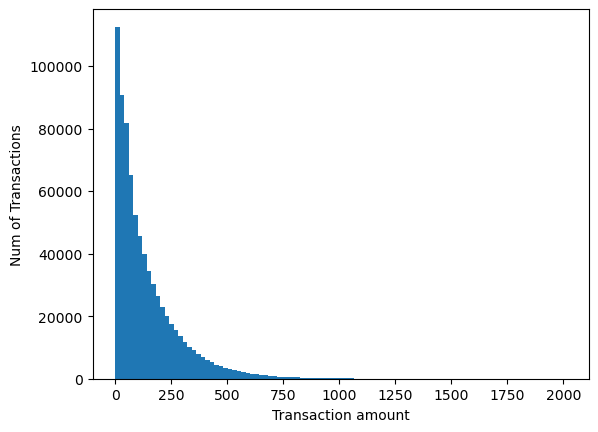

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel('Transaction amount')
plt.ylabel('Num of Transactions')
plt.hist(TA, bins=100)[0]
print("Transaction Amount Distribution")

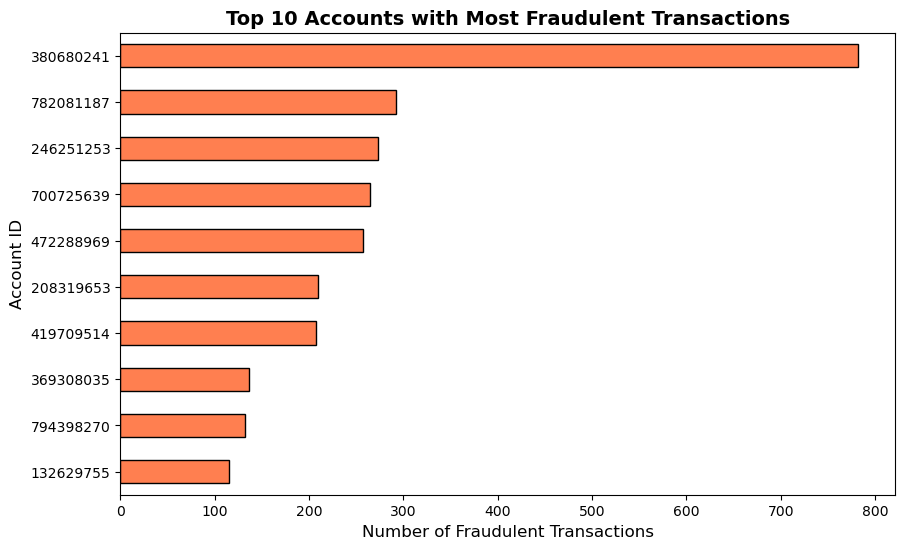

In [20]:
fraud_counts = df[df['isFraud'] == 1]['accountNumber'].value_counts().head(10)
plt.figure(figsize=(10, 6))
fraud_counts.sort_values().plot(kind='barh', color='coral', edgecolor='black')
plt.title("Top 10 Accounts with Most Fraudulent Transactions", fontsize=14, weight='bold')
plt.xlabel("Number of Fraudulent Transactions", fontsize=12)
plt.ylabel("Account ID", fontsize=12)
plt.show()

In [21]:
df['merchantName'].value_counts()

merchantName
Uber                        24860
Lyft                        24810
staples.com                 16516
oldnavy.com                 16483
alibaba.com                 16426
                            ...  
Boost Mobile #104815            2
Runners #383214                 2
Curves #849125                  1
EZ Wireless #149871             1
TMobile Wireless #602341        1
Name: count, Length: 2490, dtype: int64

Text(0, 0.5, 'Merchant Name')

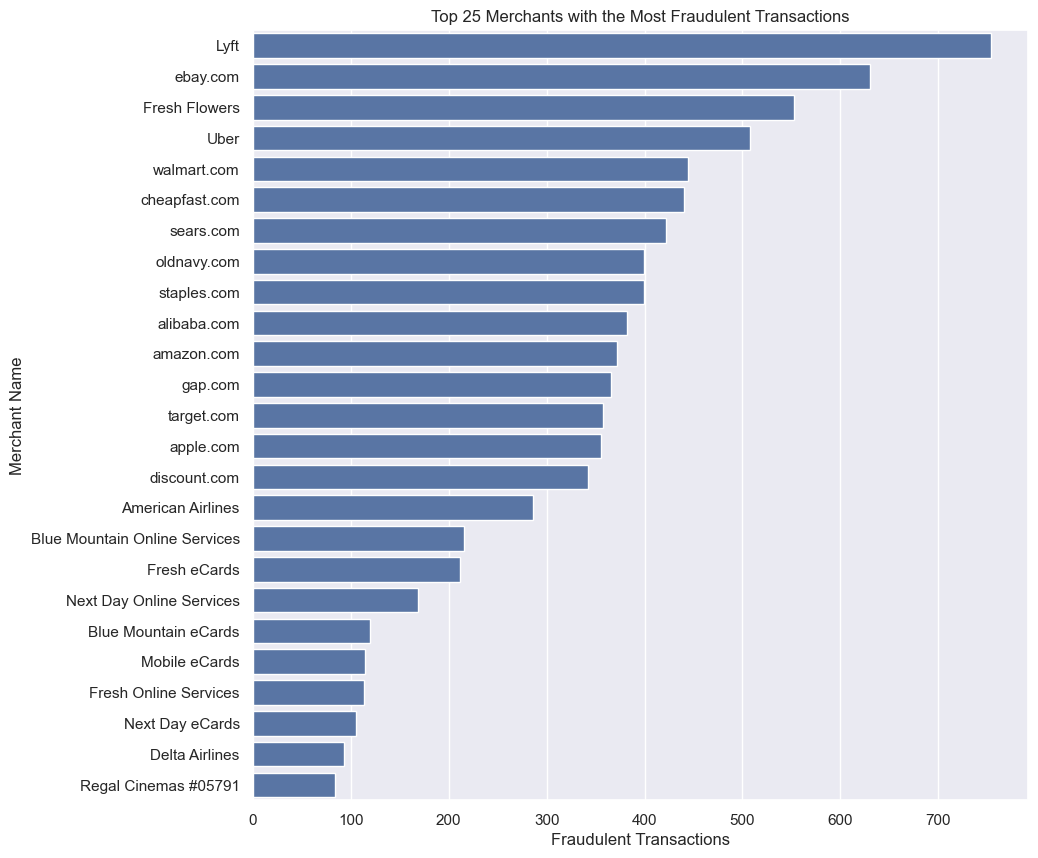

In [22]:
merch = df[df['isFraud'] == True]
sns.set(rc={'figure.figsize':(10,10)})
top = merch['merchantName'].value_counts().head(25)
sns.barplot(y=list(range(25)), x=top.values, orient='h')
plt.title('Top 25 Merchants with the Most Fraudulent Transactions')
plt.xlabel('Fraudulent Transactions')
plt.yticks(ticks=list(range(25)), labels=top.index.tolist())
plt.ylabel('Merchant Name')

The two graphs above plot the relation between accounts, fraud cases and the merchants where the cases occur. The account with ID 380680241 has the highest fraudulent transactions and lyft one of the merchant followed by ebay, freshflowers and others who have such transactions. These trends can provide a picture focusing on merchants and accounts where frauds frequently. Together, They give a picture about how fraudlent behavior is distributed across platforms and individuals which can identify patterns improving measures to prevent them.

/var/folders/c7/tlhm96t55cb_f5f5rxwqrm180000gn/T/ipykernel_54458/3373695846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n_cols[counter]], ax=ax[j], color=colors[j])
/var/folders/c7/tlhm96t55cb_f5f5rxwqrm180000gn/T/ipykernel_54458/3373695846.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

Text(0.5, 0.98, 'Data Distribution')

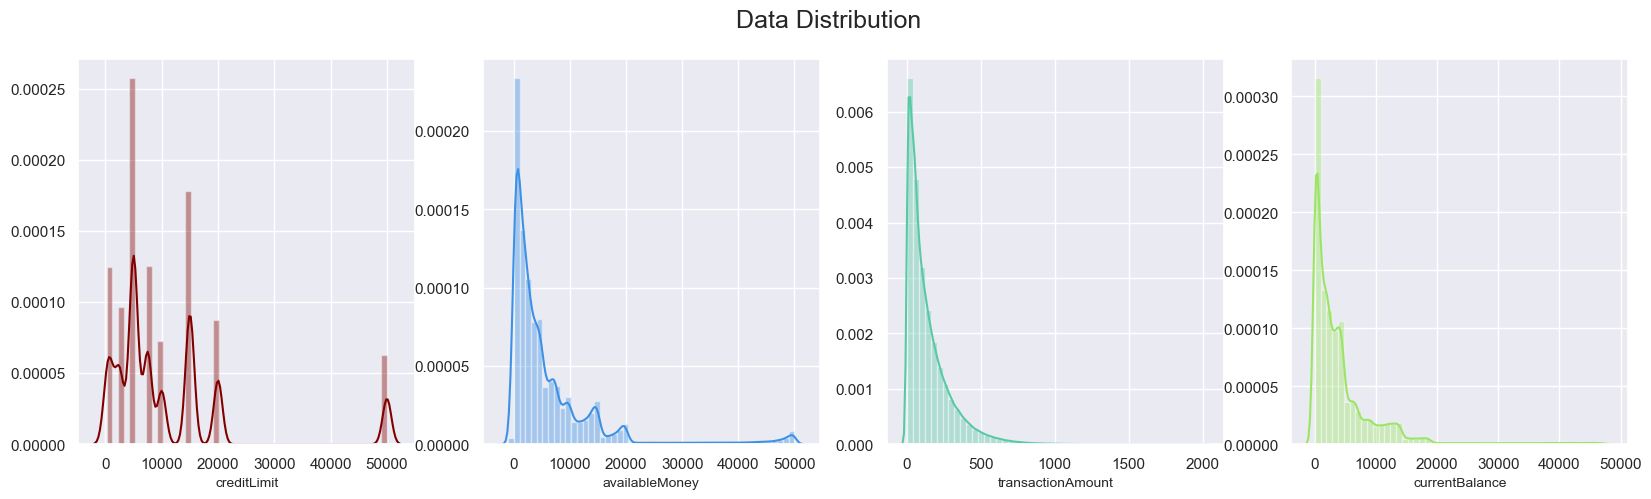

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
n_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
colors = ['#800000','#3C91E6','#59C9A5','#9BE564']
counter = 0
for j in range(4):
    sns.distplot(df[n_cols[counter]], ax=ax[j], color=colors[j])
    ax[j].set_xlabel(n_cols[counter], fontsize=10)
    ax[j].set_ylabel('')
    counter+=1
fig.suptitle('Data Distribution', fontsize=18)

The distributions of four financial attributes—credit limits, available funds, transaction amounts, and current balances—are shown in the visualisations. Most values are concentrated in lower ranges across all graphs, suggesting that most accounts have quite moderate financial activity. Only a small number of accounts achieve higher requirements for credit limits and current balances, which are typically low. The majority of transactions involve tiny amounts, and only a small percentage of accounts have considerable available funds, according to available money and transaction quantities. Overall, this trend indicates that rather conservative financial behaviour is the focus of usual customer activity.

/var/folders/c7/tlhm96t55cb_f5f5rxwqrm180000gn/T/ipykernel_54458/264354913.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='creditLimit', y='transactionAmount', palette='coolwarm')


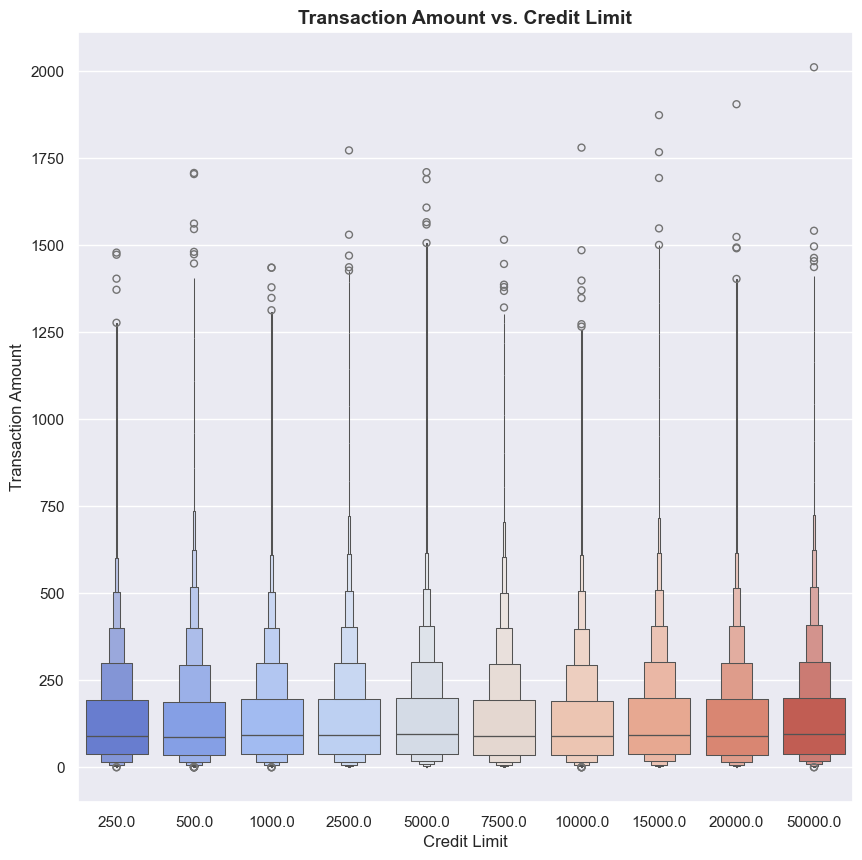

In [24]:
sns.boxenplot(data=df, x='creditLimit', y='transactionAmount', palette='coolwarm')
plt.title("Transaction Amount vs. Credit Limit", fontsize=14, weight='bold')
plt.xlabel("Credit Limit", fontsize=12)
plt.ylabel("Transaction Amount", fontsize=12)
plt.show()

To complement my transaction amount histogram, I created a dot plot that represents the relationship between credit limit range, and transaction amount. Each dot represents an individual transaction grouped by the credit limit. The distribution of transaction amounts seems to be similar across different credit limit ranges. There doesn’t seem to be a correlation between spending and credit limit.  My initial assumption was that people with higher credit limit would spend more but it doesn’t seem that way since their spending is more on the lower to the mid-range. Spending can be influenced by a lot of factors such as income, lifestyle, etc. 

<Axes: >

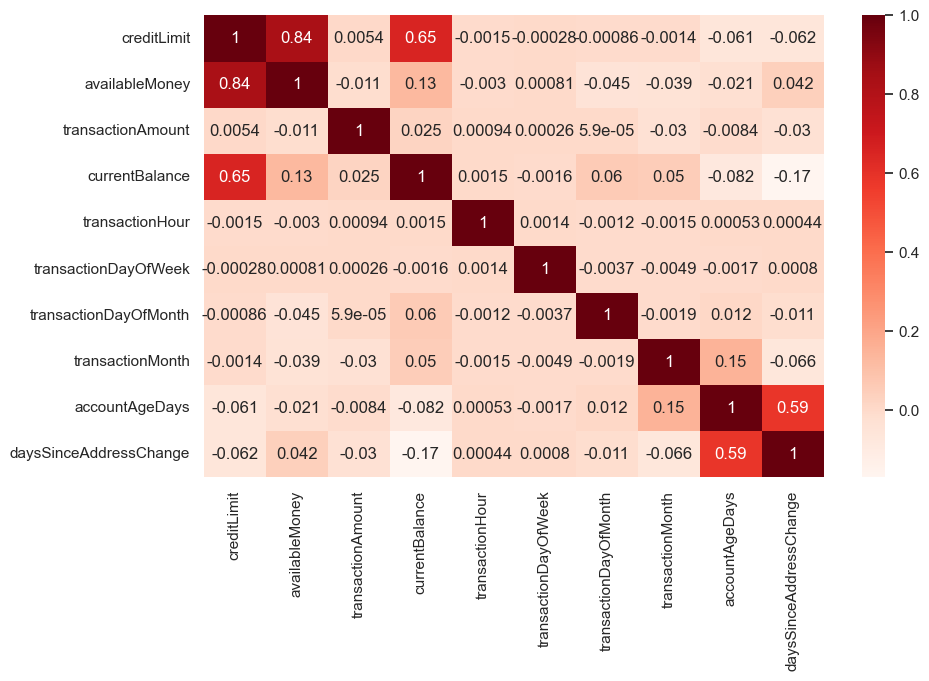

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6)) 
numeric_df = df.select_dtypes(include=['number'])
cor = numeric_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [26]:
df.drop(['enteredCVV'],axis=1, inplace=True)

Here the variable pairs (accountNo, customerId), (cardCVV, enteredCVV) and (availableBalance, creditLimit) are highly co-related. Hence, either one of these variables could simply be droppped if the independent features need to be reduced.

In [27]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transactionHour,transactionDayOfWeek,transactionDayOfMonth,transactionMonth,accountAgeDays,daysSinceAddressChange
0,737265056,737265056,5000.0,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,0.00,False,False,False,14,5,13,8,518,518
1,737265056,737265056,5000.0,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,0.00,True,False,False,5,1,11,10,577,577
2,737265056,737265056,5000.0,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,0.00,False,False,False,9,1,8,11,605,605
3,737265056,737265056,5000.0,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,0.00,False,False,False,2,5,10,12,637,637
4,830329091,830329091,5000.0,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,0.00,True,False,False,21,3,24,3,231,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764133,732852505,732852505,50000.0,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,...,1095.04,False,False,False,18,3,22,12,1582,1582
764134,732852505,732852505,50000.0,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,...,1214.96,False,False,False,16,6,25,12,1585,1585
764135,732852505,732852505,50000.0,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,...,1233.85,False,False,False,15,1,27,12,1587,1587
764136,732852505,732852505,50000.0,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,...,1283.28,False,False,False,0,3,29,12,1589,1589


In [28]:
#Section3 Data Wrangling

In [29]:
df['transactionType'].value_counts()

transactionType
PURCHASE    743709
REVERSAL     19731
               698
Name: count, dtype: int64

In [30]:
df['isFraud'].value_counts()

isFraud
False    751843
True      12295
Name: count, dtype: int64

In [31]:
reverse_transactions = df[df['transactionType']=='REVERSAL']
reverse_total = reverse_transactions['transactionAmount'].sum()
reverse_total

2821792.4999999995

In [32]:
fraud_transactions = df[df['isFraud']==True]
fraud_total=fraud_transactions['transactionAmount'].sum()
fraud_total

2796505.8899999997

Reversed and Fraudulent Transaction Estimates
1. Number of reversed transactions: 19,731 
2. Total estimate for reversed transactions: $2,821,792.5
3. Number of Fraudulent transactions: 12,295 
4. Total estimate lost in Fraudulent transactions: $2,796,505.89

Transactions with Multiple Swipes
Multi-swipe occurs when a merchant charges a card more than once in a brief period of time. This brief period can be either in ranges of minutes or within a certain hour.  I'm assuming that any repeated transactions occur within 60 minutes are regarded as multiswipe transactions for simplicity.

The methodology for identifying multiswipe transactions:

- To make calculations easier, first convert each transactionDateTime to its matching dateTime.
- The transactions are then sorted in descending order of DateTime (latest is first) after being grouped by Account Number, Merchant Id, and Transaction Amount.
- Then, calculate the time difference (in seconds) between each consecutive request.
- Next, mark any transaction with a time interval of less than an hour (3600 seconds).


In [33]:
df = df.sort_values(by=['accountNumber', 'merchantName', 'transactionAmount', 'transactionDateTime'])
df['time_span'] = df['transactionDateTime'].diff(2).dt.total_seconds()/3600
multiple_swipe = df.groupby(['accountNumber', 'merchantName', 'transactionAmount'])
multiple_swipe.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardPresent,expirationDateKeyInMatch,isFraud,transactionHour,transactionDayOfWeek,transactionDayOfMonth,transactionMonth,accountAgeDays,daysSinceAddressChange,time_span
526612,100088067,100088067,50000.0,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,...,True,False,False,19,4,8,4,820,820,NaN
526657,100088067,100088067,50000.0,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,...,True,False,False,7,2,9,11,1035,1035,NaN
526615,100088067,100088067,50000.0,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,...,True,False,False,2,4,6,5,848,848,654.956944
526599,100088067,100088067,50000.0,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,...,True,False,False,4,2,3,2,755,755,-6722.620000
526620,100088067,100088067,50000.0,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,...,True,False,False,18,4,3,6,876,876,687.948333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105158,999389635,999389635,5000.0,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,...,False,False,False,13,3,22,9,349,349,1500.505556
105159,999389635,999389635,5000.0,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,...,False,False,False,16,6,23,10,380,380,1493.081389
105160,999389635,999389635,5000.0,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,...,False,False,False,0,3,24,11,412,412,1498.387778
105155,999389635,999389635,5000.0,4943.92,2016-08-04 20:27:36,42.98,oldnavy.com,US,US,09,...,False,False,False,20,3,4,8,300,300,-2667.902778


In [34]:
multi_purchase = df.groupby(['accountNumber', 'merchantName', 'transactionAmount'])
multi_purchase['time_span'].head()

526612            NaN
526657            NaN
526615     654.956944
526599   -6722.620000
526620     687.948333
             ...     
105158    1500.505556
105159    1493.081389
105160    1498.387778
105155   -2667.902778
105153   -7646.930278
Name: time_span, Length: 744369, dtype: float64

An interesting observation is that a majority of reversal transactions occur after fraudulent or multiswipe transactions between a specific pair of customer IDs and merchants.

In [35]:
multi_swipe = df[df.time_span < 0]
multi_swipe['transactionAmount']

526599    141.60
526641     55.04
526604     71.35
526634    113.70
526614      3.96
           ...  
651077    520.34
105157    267.62
105156      4.62
105155     42.98
105153    101.46
Name: transactionAmount, Length: 369686, dtype: float64

In [36]:
multi_total=multi_swipe['transactionAmount'].sum()
multi_total

53882094.66000001

In [37]:
#Section4 Modeling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
features = ['creditLimit','availableMoney','transactionAmount','posEntryMode','posConditionCode','merchantCategoryCode','currentBalance','transactionType']
target = 'isFraud'
X = df[features]
y = df[target]
X = pd.get_dummies(X, drop_first=True)

In [39]:
fraud_data = df[df['isFraud'] == 1]
non_fraud_data = df[df['isFraud'] == 0].sample(len(fraud_data), random_state=42)  
balanced_data = pd.concat([fraud_data, non_fraud_data])
X_balanced = balanced_data[features]
X_balanced = pd.get_dummies(X_balanced, drop_first=True)
y_balanced = balanced_data[target]


In [40]:
X_balanced = pd.get_dummies(X_balanced, drop_first=True)
y_balanced = balanced_data[target]

In [41]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)

In [42]:
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
y_pred_proba = model_dt.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[2189 1504]
 [1440 2244]]

Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.59      0.60      3693
        True       0.60      0.61      0.60      3684

    accuracy                           0.60      7377
   macro avg       0.60      0.60      0.60      7377
weighted avg       0.60      0.60      0.60      7377


ROC-AUC Score: 0.6009317742608387


I began with a decision tree model and worked my way to Xgboost testing all the four models that I wanted to work with. I began by balancing the fraud class imbalance using random under sampling to ensure the model doesn't become biased toward non-fraud cases. I selected features such as credit limit, available money, etc., and split the data into an 80:20 train test ratio. The decision tree model has an AUC that performs slightly better than guessing. They are interpretable but performance is in this case is insufficient. Using this model might lead to negative impacts on a business decisions if critical cases are missed. 

In [43]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(random_state=42)

In [44]:
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)
y_pred_proba = model_log.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[2484 1209]
 [1191 2493]]

Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.67      0.67      3693
        True       0.67      0.68      0.68      3684

    accuracy                           0.67      7377
   macro avg       0.67      0.67      0.67      7377
weighted avg       0.67      0.67      0.67      7377


ROC-AUC Score: 0.7275944335808009


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression model is simple and highly interpretable making it a good baseline model to evaluate binary outcomes and provides the cofficients that quantify the impact of prefictors like credit limit, transaction amount on the probability of fraud. It has an edge over the decision tree model since decision trees are more prone to overfitting. The metrics I used to evaluate this model remain the same F1, recall, precision and the AUC score. An AUC score of 0.72 indicates a decent performance better than the decision model. The correctly identified cases account to about 2,500 true positive cases that can prevent financial loss. About 1,209 (false positives) incorrectly flagged legitmate transactions that may cause inconveniences and dissatisfaction amongst customers. 

In [45]:
#Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[2491 1202]
 [1190 2494]]

Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.67      0.68      3693
        True       0.67      0.68      0.68      3684

    accuracy                           0.68      7377
   macro avg       0.68      0.68      0.68      7377
weighted avg       0.68      0.68      0.68      7377


ROC-AUC Score: 0.7325286445906846


A random forest model combines multiple decision trees to reduce overfitting. I utilized a confusion matrix, F1, precision, recall and AUC-ROC score to evaluate the model. An AUC of 0.73 indicates the model’s ability to distinguish between fraudulent and non-fraudulent transactions, performing better than the decision tree and logistic regression. The precision and recall scores here show that the model how good the model is at flagging fraudlent transactions. Assuming that there are 100 transactions in total, the model flags about 68 true fraud cases leading to a reduction in false alarms (non fraud cases). Assuming there are 10 cases, the model nearly identifies 7 correct cases out of 10. This ensures that important positive cases are identified while keeping misclassifications minimal. This balance can drive better decision-making without introducing unnecessary risks from false predictions.

In [46]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[2486 1207]
 [1027 2657]]

Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.67      0.69      3693
        True       0.69      0.72      0.70      3684

    accuracy                           0.70      7377
   macro avg       0.70      0.70      0.70      7377
weighted avg       0.70      0.70      0.70      7377


ROC-AUC Score: 0.7325286445906846


/Applications/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


The XGboost model performs relatively better compared to all other models with an accuracy of 71% approximately and an score 0.73 shows that the model demonstrates a strong ability to distinguish between different outcomes effectively. These metrics show that the model balances false positives and false negatives well, making it reliable for decision-making. The model correctly identifies 72% of all positive cases (fraudlent) ensuring 69% of them are precise. A firm can use the AUC score and alocate resources for fraud investigation and reduces financial losses. In the context of banking and fraud prediction, missing out on predicting fraudlent cases can have major impacts on customer base and the revenue generated. The Xgboost model gives an overall 69% of accuracy in identifying actual fraud cases which can be used to minize unnecessary investigation costs and customer dissatisfaction caused by false alarms. 

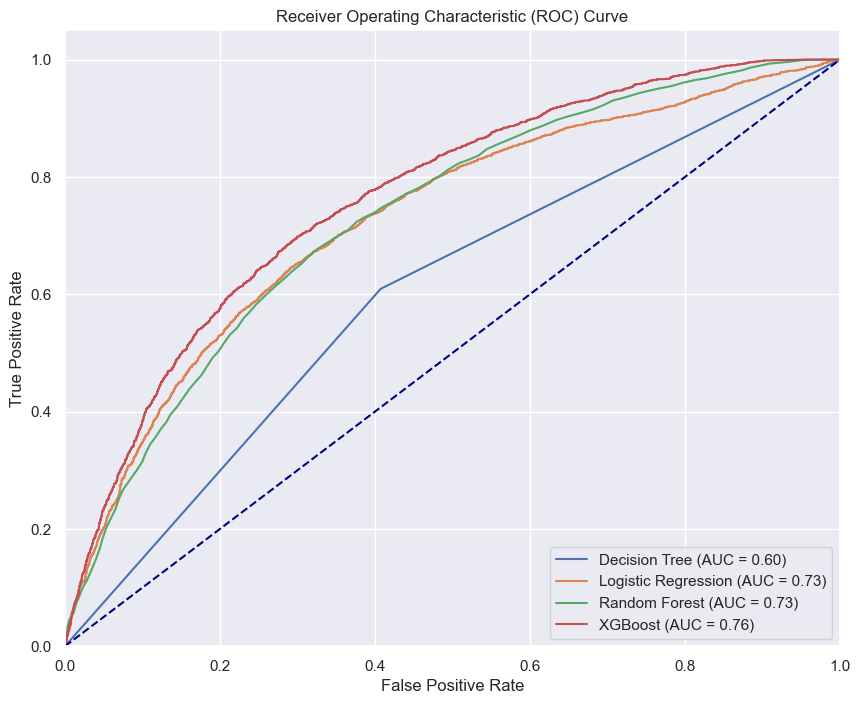

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_true = y_test
y_pred_prob_logistic = model_log.predict_proba(X_test)[:, 1]
y_pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_pred_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]
y_pred_prob_dt = model_dt.predict_proba(X_test)[:, 1]
models = { 
    'Decision Tree': y_pred_prob_dt, 
    'Logistic Regression': y_pred_prob_logistic,
    'Random Forest': y_pred_prob_rf,
    'XGBoost': y_pred_prob_xgb
}
plt.figure(figsize=(10, 8))
for model_name, y_pred_prob in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Models Analysis

XGBoost has the an relatively high accuracy in predicting fraud transactions compared to the previous models. Random forests are bagged decision tree models that split on a subset of features on each split instead of using all the features at once. This helps in determining the best step forward at each iteration amongst all the models. XGBoost Classifier has the best Area under Curve and therefore is the best model for analysing and predicting the fraud transactions. However Random Forest Classifier also has reasonably similar test accuracy and AUC. Hence even Random Forest Classifier can be considered as a good choice for predicting the fraud transactions

XGBoost >= Random Forest > Logistic Regression > Decision Tree. 

Methodology 

I began the project by loading and inspecting the dataset, understanding the columns, fields, data types and the relationship between them. The next step was fixing important problems such null entries, missing data, and inconsistencies. Since accurate and comprehensive information is crucial for fraud detection, cleaning the data is an essential first step. The way missing values are handled, whether by imputation, removal, or prediction techniques, provides a solid basis for model performance. After that, you conducted data wrangling to glean insightful information by examining the distribution of multi-swipe transactions, fraud cases, and reversals. Finding temporal trends—which are frequently powerful predictors of fraudulent activity—was made easier by breaking down these patterns by date, time, and hour of occurrence (e.g., an unusual surge in transactions late at night). The model was able to concentrate on questionable patterns of behaviour because the exploratory data analysis (EDA) probably revealed some helpful features.
The next step was model development, where Decision Trees, Logistic Regression, Random Forest, and XGBoost models were built. Decision Trees provided a simple, interpretable baseline, while Logistic Regression helped assess linear relationships between predictors and the target (fraud). Random Forest improved performance by aggregating multiple decision trees, while XGBoost further enhanced this through gradient boosting, delivering optimal predictions by reducing bias and variance. After evaluating all models, you chose XGBoost because it achieved the best ROC-AUC score, a robust metric for fraud detection as it measures the model’s ability to distinguish between fraudulent and non-fraudulent transactions. Evaluating the model relied on utilizing metrics like ROC-AUC, accuracy, precision, recall, and F1-score. This is appropriate, as fraud detection emphasizes balancing precision (to minimize false positives) and recall (to avoid missing fraud cases). However, additional metrics such as Precision-Recall AUC (more insightful for imbalanced datasets) or False Positive Rate could provide deeper insights into the trade-offs. Analyzing confusion matrix trends (e.g., why certain cases were misclassified) may reveal opportunities for feature engineering or hyperparameter tuning.


Areas of imporvement 

1. Feature encoding 
Utilizing one hot encoding for categorical features like day of week of the transaction, merchant category code. I did try a manual approach to one hot encoding but the process was computationally intensive. I refered to https://builtin.com/articles/one-hot-encoding in order to decide on the optimal approach but the process proved to be an intensive process. 

2. Neural networds 
While solving this particular problem, I did think of if neural networks can be used. These could be a good choice given the dimensions of the dataset. A feed forward neural network and RNN or LSTMS could be a consideration is what I thought since these would be ideal tabular data and for sequential transaction data that might indicate fraud. But these networks require a lot of hyper parameter tuning and feature scaling. 

References - https://docdrop.org/download_annotation_doc/AAAMLP-569to.pdf , https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/

While going through the book Approaching (Almost) Any Machine Learning Problem, since random forest and xgboost are the most optimal models that can solve this issue, I came across an article that spoke about combining the two - a random forest ensambled with Xgboost. This is something which I will explore after this activity along with implementing the Neural network model. 